<center>
<h2>IPM-407: Modelación Computacional con Algoritmos Rápidos</h2>
<h3>Proyecto 2 - Métodos basados en transformadas de Fourier</h3>
<h4>Daniel San Martín</h4>
</center>

# Tabla de Contenidos
* [1. Introducción](#introduccion)
* [2. Desarrollo](#desarrollo)
* [3. Conclusiones](#conclusiones)
* [4. Referencias](#referencias)

<div id="introduccion" />
## 1. Introducción

Para este proyecto el objetivo es utilizar métodos basados en las transformadas de Fourier para resolver ecuaciones diferenciales parciales, específicamente las del tipo elípticas. Dada las condiciones de borde de este problema en particular, es más favorable utilizar la transformada del seno.

### 1.1 La transformada de Fourier 

La transformada de Fourier, denominada así por Joseph Fourier, es una transformación matemática empleada para transformar señales entre el dominio del tiempo (o espacial) y el dominio de la frecuencia, que tiene muchas aplicaciones en la física y la ingeniería. Está definida de muchas formas, pero la utilizada en [1] junto a su inversa son:

\begin{equation}
    \hat{f}(\omega) = \int_{-\infty}^{\infty}f(x)e^{-i2\pi\omega x}d\omega, \qquad
    f(x) = \int_{-\infty}^{\infty}\hat{f}(\omega)e^{i2\pi\omega x}d\omega, \quad \text{con} ~ x, \omega \in \mathbb{R}
\end{equation}

Su uso para resolución de problemas computacionales está más relacionada con la transformada discreta de Fourier (y su inversa respectivamente):

\begin{equation}
    F_k = \sum_{n=0}^{N-1}f_n e^{\frac{-i2\pi nk}{N}}, \qquad
    f_n = \sum_{k=0}^{N-1}F_k e^{\frac{i2\pi nk}{N}}
\end{equation}

Su extensión para 2 dimensiones y su respectiva inversa están representadas por

\begin{equation}
    F_{jk} = \sum_{m=0}^{M-1}\sum_{n=0}^{N-1}f_{mn} e^{-i2\pi\left(\frac{mk}{M} + \frac{nk}{N}\right)},\qquad
    f_{mn} = \sum_{j=0}^{M-1}\sum_{k=0}^{N-1}F_{jk} e^{i2\pi\left(\frac{mk}{M} + \frac{nk}{N}\right)}
\end{equation}


### 1.2 La transformada Discreta del Seno (DST)

Es posible obtener la (DST) manejando la expresión de Fourier y junto a su inversa está definida por 

\begin{equation}
    F_k = \sum_{n=1}^{N-1}f_{mn}\sin\left(\frac{\pi kn}{N}\right), \qquad
    f_n = 2\sum_{k=1}^{N-1}f_n\sin\left(\frac{\pi kn}{N}\right),
\end{equation}

además, su extensión a dos dimensiones está expresada por

\begin{equation}
    F_{jk} = -\frac{1}{MN}\sum_{m=1}^{M-1}\sum_{n=1}^{N-1}f_{mn}\sin\left(\frac{\pi jm}{M}\right)\sin\left(\frac{\pi kn}{N}\right), \qquad
    f_{mn} = \sum_{m=1}^{M-1}\sum_{n=1}^{N-1}F_{jk}\sin\left(\frac{\pi jm}{M}\right)\sin\left(\frac{\pi kn}{N}\right),
\end{equation}

<div id="desarrollo" />
## 2. Desarrollo

Consideren la siguiente ecuación de Poisson

\begin{equation}
    \frac{\partial^2\phi}{\partial x^2} + \frac{\partial^2\phi}{\partial y^2} = \frac{1}{\pi^2}
    \left[30\left(\left(\frac{x}{\pi}\right)^2-\frac{x}{\pi}\right) 
    + 30\left(\left(\frac{y}{\pi}\right)^2-\frac{y}{\pi}\right) - 4\pi^2\left(\frac{x}{\pi}-1 \right)\sin(2y) \right]
\end{equation}

en el cuadrado $0\leq x \leq \pi$ y $0 \leq y \leq \pi$ y con condiciones de contorno $\phi(0,y)=\phi(\pi,y)=\phi(x,0)=\phi(x,\pi)=0$. Resuelvan numéricamente esta ecuación usando

1. Método espectral
2. Diferencias finitas aceleradas con FFT en 2D (tipo pregunta 4 de la tarea 2)
3. Diferencias finitas aceleradas con FFT en 1D (tipo pregunta 5 de la tarea)

Para mallas de $N = 16, 32, 64$ y $128$ nodos (o más!) En su informe, detalle la implementación de cada técnica y discuta los siguientes puntos:

1. Convergencia del error.
2. Complejidad algoritmica ($N$ versus tiempo).
3. Memoria utilizada.
4. Conclusiones con respecto a la conveniencia de cada caso.

La solución analítica de esta ecuación es 
\begin{equation}
    \phi(x,y) = 15\left(\left(\frac{x}{\pi}\right)^2-\frac{x}{\pi}\right)
    \left(\left(\frac{y}{\pi}\right)^2-\frac{y}{\pi}\right)-\sin(2y)\frac{\sinh(2\pi(\frac{x}{\pi}-1))}{\sinh(2\pi)}
    + \left(\frac{x}{\pi}-1 \right)\sin(2y)
\end{equation}

### Ayuda

1. Esta tarea está inspirada en el Ejemplo 6.4 del libro *Fundamentals of Engineering Numerical Analysis* de Parviz Moin.
2. Las condiciones de borde homogénea $\phi = 0$ en los bordes son concordantes con la función seno, por lo tanto es más conveniente usar la transformada del seno. Hay una implementación de la transformada del seno en **scipy.fftpack**. Otra opción es calcular la transformada discreta del seno con FFTs de la forma:

```python
def dst_2D(x):
    M, N = numpy.shape(x)
    x = x[1:M−1,:]
    M,N = numpy.shape(x)
    y = numpy.zeros((2∗(M+1),N))
    y[0,:] = numpy.zeros(N)[:]
    y[1:M+1,:] = x[:,:]
    y[M+1,:] = numpy.zeros(N)[:]
    y[M+2:2∗M+ 2,:] = −numpy.flipud(x)[:,:]
    y_t = fft(numpy.transpose(y))
    y_t = numpy.transpose(y_t)
    y = numpy.real((y_t[1:M+1])/(−1j∗(M+1)))
    yy = numpy.zeros((M+2,N))
    yy[1:M+1,:] = y[:,:]
    return yy
```

```python
def dst_1D(x):
    M = len(x)
    x = x[1:M−1]
    M = len(x)
    y = array([0])
    y = numpy.append(y,x)
    y = numpy.append(y,0)
    y = numpy.append(y, −numpy.flipud(x))
    y_t = numpy.fft.fft(y)
    
    y = numpy.real(y_t[1:M+1]/(−1j ∗(M+1)))
    yy = numpy.array([0])
    yy = numpy.append(yy, y)
    yy = numpy.append(yy, 0)
    return yy
```
Considerando que la transformada inversa del seno es igual a la transformada del seno multiplicado por $N/2$

### Implementación de funciones

In [1]:
%matplotlib inline
import numpy as np
import scipy.fftpack as spfft
import matplotlib.pyplot as plt
import scipy.sparse as scsp
import scipy.sparse.linalg as spla
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from dcst import *

In [2]:
def plot(x, y, u, plot_title="Test", plot_type=""):
    """
    Grafica la solucion del problema.
    
    Parametros
    -----------
    x: numpy.array
       Arreglo para el eje X
    y: numpy.array
       Arreglo para el eje Y
    u: numpy.array
       Matriz de soluciones - u(x,y)
    plot_title: string
        Nombre del grafico
    plot_type: string
        3D o de contorno
    
    Retorna
    ----------
    None, Grafico de la solucion
    
    """
    if plot_type == "3D":
        fig = plt.figure(figsize=(12,8))
        ax = fig.gca(projection='3d')
        X, Y = np.meshgrid(x,y)
        surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, 
                               cmap=cm.coolwarm, linewidth=0, antialiased=False)
        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')
        ax.set_zlabel('$u(x,y)$')
        ax.set_title(plot_title, fontsize=20)
    else:    
        plt.imshow(u, origin="lower", cmap=cm.jet, extent=[0,np.pi,0,np.pi])
        plt.title(plot_title, fontsize=20)
        plt.colorbar()
        
    plt.show()
    
    return None

In [3]:
def L2_error(w, u):
    return np.sqrt(np.sum((w-u)**2)/np.sum(u**2))

In [4]:
def dst_2D(x):
    M, N = np.shape(x)
    x = x[1:M-1,:]
    M,N = np.shape(x)
    y = np.zeros((2*(M+1),N))
    y[0,:] = np.zeros(N)[:]
    y[1:M+1,:] = x[:,:]
    y[M+1,:] = np.zeros(N)[:]
    y[M+2:2*M+ 2,:] = -np.flipud(x)[:,:]
    y_t = np.fft.fft(np.transpose(y))
    y_t = np.transpose(y_t)
    y = np.real((y_t[1:M+1])/(-1j*(M+1)))
    yy = np.zeros((M+2,N))
    yy[1:M+1,:] = y[:,:]
    return yy

In [5]:
def dst_1D(x):
    M = len(x)
    x = x[1:M-1]
    M = len(x)
    y = np.array([0])
    y = np.append(y,x)
    y = np.append(y,0)
    y = np.append(y, -np.flipud(x))
    y_t = np.fft.fft(y)

    y = np.real(y_t[1:M+1]/(-1j *(M+1)))
    yy = np.array([0])
    yy = np.append(yy, y)
    yy = np.append(yy, 0)
    return yy

In [6]:
def fa(x, y):
    X, Y = np.meshgrid(x, y)
    return 15 * ((X/np.pi)**2 - X/np.pi) * ((Y/np.pi)**2 - Y/np.pi) \
        - np.sin(2*Y) * (np.sinh(2*np.pi*(X/np.pi - 1)))/np.sinh(2*np.pi) + (X/np.pi - 1) * np.sin(2*Y)

In [7]:
def f_rhs(x, y):
    X, Y = np.meshgrid(x, y)
    return 1/(np.pi**2) * (30 * ((X/np.pi)**2 - X/np.pi) + 30 * ((Y/np.pi)**2 - Y/np.pi) \
        - 4*np.pi**2* (X/np.pi - 1) * np.sin(2*Y))

In [8]:
def convergence_plot(N, error_sp, error_d2, error_df):
    # Plot
    plt.figure(figsize=(10, 6))
    plt.loglog(N, error_sp, 'b-*', label="Espectral")
    plt.loglog(N, error_d2, 'r-o', label="DF FFT 2D")
    plt.loglog(N, error_df, 'g-x', label="DF FFT")
    plt.title("Convergencia del error")
    plt.xlabel("N")
    plt.ylabel("Error")
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return None

In [9]:
def complexity_plot(N, time_sp, time_d2, time_df):
    plt.figure(figsize=(10, 6))
    plt.loglog(N, time_sp, 'b-*', label="Espectral")
    plt.loglog(N, time_d2, 'r-o', label="DF FFT 2D")
    plt.loglog(N, time_df, 'g-x', label="DF FFT")
    plt.title("Complejidad")
    plt.xlabel("N")
    plt.ylabel("Tiempo")
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return None

In [10]:
def memory_plot(N, m1, m2, m3):
    plt.figure(figsize=(10, 6))
    plt.plot(N, m1, 'b-*', label="Espectral")
    plt.plot(N, m2, 'r-o', label="DF FFT 2D")
    plt.plot(N, m3, 'g-x', label="DF FFT")
    plt.title("Uso de Memoria")
    plt.xlabel("N")
    plt.ylabel("Memoria [GB]")
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return None

In [11]:
n = 256
M, N = n, n
x = np.linspace(0, np.pi, M)
y = np.linspace(0, np.pi, N)
u = fa(x, y)

### Solución Analítica

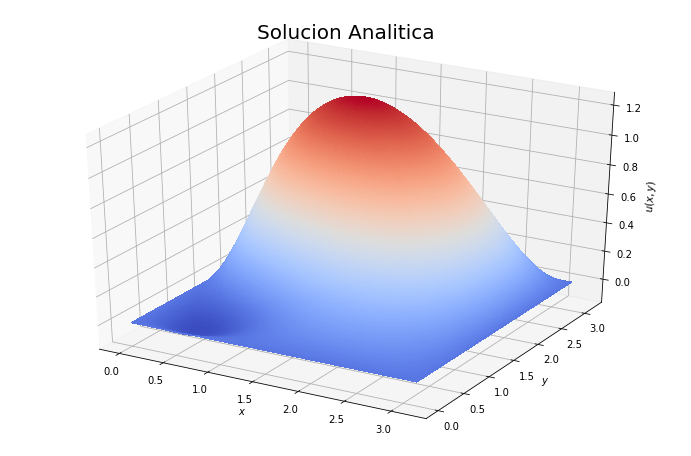

In [12]:
plot(x, y, u, plot_title="Solucion Analitica", plot_type="3D")

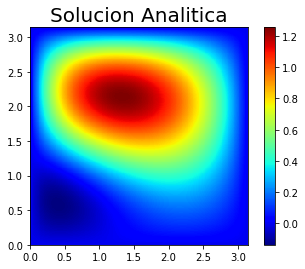

In [13]:
plot(x, y, u, plot_title="Solucion Analitica")

### 2.1 Método Espectral

Definiendo $\phi$ según la IDST en 2D tenemos
\begin{equation}
    \phi_{m,n} = \sum_{j=1}^{M-1}\sum_{k=1}^{N-1}\Phi_{jk}\sin\left(\frac{\pi mj}{M}\right)
        \sin\left(\frac{\pi nk}{N}\right)
\end{equation}

de donde su segunda derivada con respecto a $x$ queda expresada por
\begin{equation}
    \partial_{xx}\phi_{m,n} = \sum_{j=1}^{M-1}\sum_{k=1}^{N-1}-j^2\Phi_{jk}\sin\left(\frac{\pi mj}{M}\right)
        \sin\left(\frac{\pi nk}{N}\right)
\end{equation}

y con respecto a $y$ queda expresada por
\begin{equation}
    \partial_{yy}\phi_{m,n} = \sum_{j=1}^{M-1}\sum_{k=1}^{N-1}-k^2\Phi_{jk}\sin\left(\frac{\pi mj}{M}\right)
        \sin\left(\frac{\pi nk}{N}\right)
\end{equation}

Además, el lado derecho de la ecuación ("$f(x,y)$") se puede expresar como
\begin{equation}
    f_{m,n} = \sum_{j=1}^{M-1}\sum_{k=1}^{N-1}F_{jk}\sin\left(\frac{\pi mj}{M}\right)
        \sin\left(\frac{\pi nk}{N}\right)
\end{equation}

Reemplazando en la EDP, obtenemos
\begin{equation}
\begin{split}
    \partial_{xx}\phi_{m,n} + \partial_{yy}\phi_{m,n} & = f_{m,n}\\
    \sum_{j=1}^{M-1}\sum_{k=1}^{N-1}-j^2\Phi_{jk}\sin\left(\frac{\pi mj}{M}\right)
        \sin\left(\frac{\pi nk}{N}\right)
    + \sum_{j=1}^{M-1}\sum_{k=1}^{N-1}-k^2\Phi_{jk}\sin\left(\frac{\pi mj}{M}\right)
        \sin\left(\frac{\pi nk}{N}\right)
    &= \sum_{j=1}^{M-1}\sum_{k=1}^{N-1}F_{jk}\sin\left(\frac{\pi mj}{M}\right)
        \sin\left(\frac{\pi nk}{N}\right)
\end{split}
\end{equation}

de donde se tenemos la siguiente relación para cada $j$ y $k$
\begin{equation}
\begin{split}
    -(j^2 + k^2) \Phi_{jk} & = F_{jk} \\ 
    \Phi_{jk} & = -\frac{F_{jk}}{j^2 + k^2}
\end{split}
\end{equation}

De esta forma el algoritmo para calcular la solución de la EDP es el siguiente:
1. Calcular la DST de la RHS de la ecuación.
2. Utilizar la última expresión para calcular $\Phi_{jk}$.
3. Aplicar la IDST para calcular $\phi_{mn}$

<!-- Definiendo $\phi$ según la IDFT en 2D tenemos
\begin{equation}
    \phi_{m,n} = \sum_{j=0}^{M-1}\sum_{k=0}^{N-1}\Phi_{jk}e^{i2\pi\left(\frac{jm}{M} + \frac{kn}{N}\right)}
\end{equation}

de donde su segunda derivada con respecto a $x$ queda expresada por
\begin{equation}
    \partial_{xx}\phi_{m,n} = \sum_{j=0}^{M-1}\sum_{k=0}^{N-1}-j^2\Phi_{jk}e^{i2\pi\left(\frac{jm}{M} + \frac{kn}{N}\right)}
\end{equation}

y con respecto a $y$ queda expresada por
\begin{equation}
    \partial_{yy}\phi_{m,n} = \sum_{j=0}^{M-1}\sum_{k=0}^{N-1}-k^2\Phi_{jk}e^{i2\pi\left(\frac{jm}{M} + \frac{kn}{N}\right)}
\end{equation}

Además, el lado derecho de la ecuación ("$f(x,y)$") se puede expresar como
\begin{equation}
    f_{m,n} = \sum_{j=0}^{M-1}\sum_{k=0}^{N-1}F_{jk}e^{i2\pi\left(\frac{jm}{M} + \frac{kn}{N}\right)}
\end{equation}

Reemplazando en EDP, obtenemos
\begin{equation}
\begin{split}
    \partial_{xx}\phi_{m,n} + \partial_{yy}\phi_{m,n} & = f_{m,n}\\
    \sum_{j=0}^{M-1}\sum_{k=0}^{N-1}-j^2\Phi_{jk}e^{i2\pi\left(\frac{jm}{M} + \frac{kn}{N}\right)} 
    + \sum_{j=0}^{M-1}\sum_{k=0}^{N-1}-k^2\Phi_{jk}e^{i2\pi\left(\frac{jm}{M} + \frac{kn}{N}\right)}
    &= \sum_{j=0}^{M-1}\sum_{k=0}^{N-1}F_{jk}e^{i2\pi\left(\frac{jm}{M} + \frac{kn}{N}\right)}
\end{split}
\end{equation}

de donde se tenemos la siguiente relación para cada $j$ y $k$
\begin{equation}
\begin{split}
    -(j^2 + k^2) \Phi_{jk} & = F_{jk} \\ 
    \Phi_{jk} & = -\frac{F_{jk}}{j^2 + k^2}
\end{split}
\end{equation}-->

In [14]:
def spectral(x, y, M, N, f_rhs):
    
    f = f_rhs(x, y) # Evaluar el RHS de la ecuacion

    F_jk = dst2(f) # Aplicar DST a la funcion

    # Dominio de la frecuencia
    j = np.arange(M)
    k = np.arange(N)

    J, K = np.meshgrid(j, k) # Para usar operacion element-wise
    
    U_jk = np.zeros((M, N)) # Se inicializa la matriz U_jk (bordes u=0)
        
    # Calcular U_{jk}
    # Las condiciones de borde son iguales a 0, por lo tanto se omiten
    U_jk[1:-1,1:-1] = -F_jk[1:-1,1:-1]/(J[1:-1,1:-1]**2 + K[1:-1,1:-1]**2)
    
    u = idst2(U_jk) # Se aplica la inversa
    
    return u

#### Prueba método espectral para 256 nodos

In [15]:
w = spectral(x, y, M, N, f_rhs)

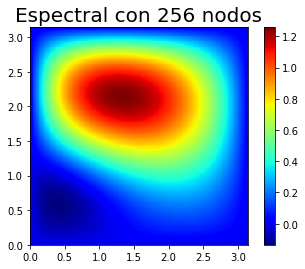

In [16]:
plot(x, y, w, plot_title="Espectral con 256 nodos")

In [17]:
L2_error(w, u)

0.012506758967010713

### 2.2 Diferencias finitas aceleradas con FFT en 2D

Discretización con diferencias finitas

\begin{equation}
    \frac{\phi_{m-1,n}-2\phi_{m,n}+\phi_{m+1,n}}{\Delta x^2}
    + \frac{\phi_{m,n-1}-2\phi_{m,n}+\phi_{m,n+1}}{\Delta y^2}
    = f_{m,n}
\end{equation}

con $\Delta x = \Delta y = h$, la ecuación queda

\begin{equation}
    \phi_{m-1,n}+\phi_{m+1,n} + \phi_{m,n-1}+\phi_{m,n+1} - 4\phi_{m,n} = h^2f_{m,n}
\end{equation}

Expresando cada elemento de la ecuación tenemos en términos de la IDST

\begin{equation}
\begin{split}
    \phi_{m,n} & = \sum_{j=1}^{M-1}\sum_{k=1}^{N-1}\Phi_{jk}\sin\left(\frac{\pi jm}
        {M}\right)\sin\left(\frac{\pi kn}{N}\right) \\
    \phi_{m-1,n} & = \sum_{j=1}^{M-1}\sum_{k=1}^{N-1}\Phi_{jk}\sin\left(\frac{\pi j(m-1)}
        {M}\right)\sin\left(\frac{\pi kn}{N}\right) \\
    \phi_{m+1,n} & = \sum_{j=1}^{M-1}\sum_{k=1}^{N-1}\Phi_{jk}\sin\left(\frac{\pi j(m+1)}
        {M}\right)\sin\left(\frac{\pi kn}{N}\right) \\
    \phi_{m,n-1} & = \sum_{j=1}^{M-1}\sum_{k=1}^{N-1}\Phi_{jk}\sin\left(\frac{\pi jm}
        {M}\right)\sin\left(\frac{\pi k(n-1)}{N}\right) \\
    \phi_{m,n+1} & = \sum_{j=1}^{M-1}\sum_{k=1}^{N-1}\Phi_{jk}\sin\left(\frac{\pi jm}
        {M}\right)\sin\left(\frac{\pi k(n+1)}{N}\right) \\
    f_{m,n} & = \sum_{j=1}^{M-1}\sum_{k=1}^{N-1}F_{jk}\sin\left(\frac{\pi jm}
        {M}\right)\sin\left(\frac{\pi kn}{N}\right)
\end{split}
\end{equation}

Sea $x=\frac{\pi j}{M}$, $y=\frac{\pi k}{N}$ y factorizando los términos se obtiene

\begin{equation}
\begin{split}
    \sum_{j=1}^{M-1}\sum_{k=1}^{N-1}\Phi_{jk}[\sin(mx-x)\sin(ny) + \sin(mx+x)\sin(ny) + & \\
        \sin(mx)\sin(ny-y) + \sin(mx)\sin(ny+y) - 4\sin(mx)\sin(ny)] & \\
         &= h^2\sum_{j=1}^{M-1}\sum_{k=1}^{N-1}F_{jk}\sin(mx)\sin(ny)
\end{split}
\end{equation}

Se puede utilizar la identidad
\begin{equation}
    \sin(x\pm y) = \sin(x)\cos(y) \pm \cos(x)\sin(y)
\end{equation}

y de esta forma para cada $j, k$ se tiene

\begin{equation}
    \Phi_{jk}[(\sin(mx)\cos(x)-\cos(mx)\sin(x))\sin(ny) + (\sin(mx)\cos(x)+\cos(mx)\sin(x))\sin(ny) + (\sin(ny)\cos(y)
        -\cos(ny)\sin(y))\sin(mx) + (\sin(ny)\cos(y)+\cos(ny)\sin(y))\sin(mx) - 4\sin(mx)\sin(ny)] = h^2F_{jk}\sin(mx)\sin(ny)
\end{equation}

\begin{equation}
    \Phi_{jk}\sin(mx)\sin(ny)[2\cos(x)+2\cos(y)-4] = h^2F_{jk}\sin(mx)\sin(ny) \\
\end{equation}

\begin{equation}
\begin{split}
    \Phi_{jk} &= \frac{h^2F_{jk}}{2\cos(x)+2\cos(y)-4} \\
    \Phi_{jk} &= \frac{h^2F_{jk}}{2\cos\left(\frac{\pi j}{M}\right)+2\cos\left(\frac{\pi k}{N}\right)-4}
\end{split}
\end{equation}

Finalmente el algoritmo para utilizar este método es:

1. Calcular la DST de la RHS de la ecuación.
2. Utilizar la última expresión para calcular $\Phi_{jk}$.
3. Aplicar la IDST para obtener $\phi_{mn}$.

<!--
Reemplazando y reagrupando los términos correspondientes, se obtiene la siguiente expresión
\begin{equation}
\begin{split}
    \sum_{j=0}^{M-1}\sum_{k=0}^{N-1}\Phi_{jk}\sin\left(\frac{m\pi(j+1)}
        {M+1}\right)\sin\left(\frac{n\pi(k+1)}{N+1}\right)
    \left[e^{\frac{-ij2\pi}{M}}+e^{\frac{ij2\pi}{M}} + e^{\frac{-ik2\pi}{N}}+e^{\frac{ik2\pi}{N}}-4\right]
    &= h^2\sum_{j=0}^{M-1}\sum_{k=0}^{N-1}F_{jk}\sin\left(\frac{m\pi(j+1)}
        {M+1}\right)\sin\left(\frac{n\pi(k+1)}{N+1}\right) \\
    \sum_{j=0}^{M-1}\sum_{k=0}^{N-1}\Phi_{jk}\sin\left(\frac{m\pi(j+1)}
        {M+1}\right)\sin\left(\frac{n\pi(k+1)}{N+1}\right)
    \left[2\cos\left(\frac{2j\pi}{M}\right) + 2\cos\left(\frac{2k\pi}{N}\right)-4\right]
    &= h^2\sum_{j=0}^{M-1}\sum_{k=0}^{N-1}\Phi_{jk}\sin\left(\frac{m\pi(j+1)}
        {M+1}\right)\sin\left(\frac{n\pi(k+1)}{N+1}\right)
\end{split}
\end{equation}


Aplicando la DFT a cada elemento de la ecuación

\begin{equation}
    \phi_{m,n} = \sum_{j=0}^{M-1}\sum_{k=0}^{N-1}\Phi_{jk}e^{i2\pi\left(\frac{jm}{M}+\frac{kn}{N}\right)}
\end{equation}
\begin{equation}
    \phi_{m-1,n} = \sum_{j=0}^{M-1}\sum_{k=0}^{N-1}\Phi_{jk}e^{i2\pi\left(\frac{j(m-1)}{M}+\frac{kn}{N}\right)}
\end{equation}
\begin{equation}
    \phi_{m+1,n} = \sum_{j=0}^{M-1}\sum_{k=0}^{N-1}\Phi_{jk}e^{i2\pi\left(\frac{j(m+1)}{M}+\frac{kn}{N}\right)}
\end{equation}
\begin{equation}
    \phi_{m,n-1} = \sum_{j=0}^{M-1}\sum_{k=0}^{N-1}\Phi_{jk}e^{i2\pi\left(\frac{jm}{M}+\frac{k(n-1)}{N}\right)}
\end{equation}
\begin{equation}
    \phi_{m,n+1} = \sum_{j=0}^{M-1}\sum_{k=0}^{N-1}\Phi_{jk}e^{i2\pi\left(\frac{jm}{M}+\frac{k(n+1)}{N}\right)}
\end{equation}
\begin{equation}
    f_{m,n} = \sum_{j=0}^{M-1}\sum_{k=0}^{N-1}F_{jk}e^{i2\pi\left(\frac{jm}{M}+\frac{kn}{N}\right)}
\end{equation}

Reemplazando y reagrupando los términos correspondientes, se obtiene la siguiente expresión
\begin{equation}
\begin{split}
    \sum_{j=0}^{M-1}\sum_{k=0}^{N-1}\Phi_{jk}e^{i2\pi\left(\frac{jm}{M}+\frac{kn}{N}\right)}
    \left[e^{\frac{-ij2\pi}{M}}+e^{\frac{ij2\pi}{M}} + e^{\frac{-ik2\pi}{N}}+e^{\frac{ik2\pi}{N}}-4\right]
    &= h^2\sum_{j=0}^{M-1}\sum_{k=0}^{N-1}F_{jk}e^{i2\pi\left(\frac{jm}{M}+\frac{kn}{N}\right)} \\
    \sum_{j=0}^{M-1}\sum_{k=0}^{N-1}\Phi_{jk}e^{i2\pi\left(\frac{jm}{M}+\frac{kn}{N}\right)}
    \left[2\cos\left(\frac{2j\pi}{M}\right) + 2\cos\left(\frac{2k\pi}{N}\right)-4\right]
    &= h^2\sum_{j=0}^{M-1}\sum_{k=0}^{N-1}F_{jk}e^{i2\pi\left(\frac{jm}{M}+\frac{kn}{N}\right)} \\
\end{split}
\end{equation}

De esta forma tenemos la relación para todo $j$ y $k$
\begin{equation}
    \left[2\cos\left(\frac{2j\pi}{M}\right) + 2\cos\left(\frac{2k\pi}{N}\right)-4\right]\Phi_{jk} = h^2F_{jk}
\end{equation}
    
\begin{equation}
    \Phi_{jk} = \frac{h^2F_{jk}}{2\cos\left(\frac{2j\pi}{M}\right) + 2\cos\left(\frac{2k\pi}{N}\right)-4}
\end{equation}
-->

In [18]:
def DF_FFT_2D(x, y, M, N, f_rhs):
    
    h = x[1] - x[0] # h = dx = dy
    
    f = f_rhs(x, y) # Evaluacion RHS de la ecuacion

    F_jk = dst2(f) # Transformada de f
    
    # Dominio de Fourier
    j = np.arange(M)
    k = np.arange(N)
    
    J, K = np.meshgrid(j, k) # Para usar operacion element-wise
    
    U_jk = np.zeros((M, N)) # Se inicializa la matriz U_jk (bordes u=0)
    
    # Las condiciones de borde son iguales a 0, por lo tanto se omiten
    U_jk[1:-1, 1:-1] = h**2 * F_jk[1:-1,1:-1] \
        /(2*np.cos(J[1:-1,1:-1]*np.pi/M) + 2*np.cos(K[1:-1,1:-1]*np.pi/N) - 4)       
    
    u = idst2(U_jk) # Se aplica la inversa
    
    return u

In [19]:
w = DF_FFT_2D(x, y, M, N, f_rhs)

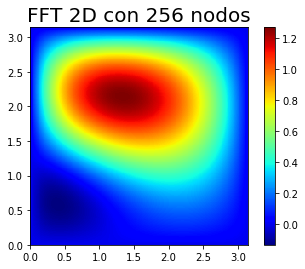

In [20]:
plot(x, y, w, plot_title="FFT 2D con 256 nodos")

In [21]:
L2_error(w, u)

0.017724726647603883

### 2.3 Diferencias finitas aceleradas con FFT en 1D

Discretizando la ecuación con diferencias finitas de segundo orden tenemos
\begin{equation}
    \frac{\phi_{m-1,n}-2\phi_{m,n}+\phi_{m+1,n}}{\Delta x^2}
    + \frac{\phi_{m,n-1}-2\phi_{m,n}+\phi_{m,n+1}}{\Delta y^2}
    = f_{m,n}
\end{equation}

con $\Delta x = \Delta y = h$, la ecuación queda

\begin{equation}
    \phi_{m-1,n}+\phi_{m+1,n} + \phi_{m,n-1}+\phi_{m,n+1} - 4\phi_{m,n} = h^2f_{m,n}
\end{equation}

Utilizando el eje $x$ (iterador $m$) para realizar la IDST:

\begin{equation}
    \phi_{m,n} = \sum_{j=1}^{M-1}\Phi_{jn}\sin\left(\frac{\pi jm}{M}\right)
\end{equation}
\begin{equation}
    f_{m,n} = \sum_{j=1}^{M-1}F_{jn}\sin\left(\frac{\pi jm}{M}\right)
\end{equation}

Reemplazando en la ecuación y agrupando los términos
\begin{equation}
\begin{split}
    %\phi_{m-1,n}+\phi_{m+1,n} + \phi_{m,n-1}+\phi_{m,n+1} - 4\phi_{m,n} & = h^2f_{m,n} \\
    \sum_{j=1}^{M-1}\Phi_{jn}\sin\left(\frac{\pi j(m-1)}{M}\right)
    + \sum_{j=1}^{M-1}\Phi_{jn}\sin\left(\frac{\pi j(m+1)}{M}\right) 
    + \sum_{j=1}^{M-1}\Phi_{j(n-1)}\sin\left(\frac{\pi jm}{M}\right)& \\
    + \sum_{j=1}^{M-1}\Phi_{j(n+1)}\sin\left(\frac{\pi jm}{M}\right)
    - 4\sum_{j=1}^{M-1}\Phi_{jn}\sin\left(\frac{\pi jm}{M}\right) 
    & = h^2\sum_{j=1}^{M-1}F_{jn}\sin\left(\frac{\pi jm}{M}\right) \\
    \sum_{j=1}^{M-1}\Phi_{jn}\left[\sin\left(\frac{\pi j(m-1)}{M}\right) + 
    \sin\left(\frac{\pi j(m+1)}{M}\right)- 4\sin\left(\frac{\pi jm}{M}\right) \right] 
    + \sum_{j=1}^{M-1}\sin\left(\frac{\pi jm}{M}\right)\left[\Phi_{j(n-1)} + \Phi_{j(n+1)} \right]
    & = h^2\sum_{j=1}^{M-1}F_{jn}\sin\left(\frac{\pi jm}{M}\right)\\
    \sum_{j=1}^{M-1}\Phi_{jn}\sin\left(\frac{\pi jm}{M}\right)\left[2\cos\left(\frac{\pi j}{M}\right)- 4 \right] 
    + \sum_{j=1}^{M-1}\sin\left(\frac{\pi jm}{M}\right)\left[\Phi_{j(n-1)} + \Phi_{j(n+1)} \right]
    & = h^2\sum_{j=1}^{M-1}F_{jn}\sin\left(\frac{\pi jm}{M}\right)\\
    \sum_{j=0}^{M-1}\left[\Phi_{j(n-1)}+ \left(2\cos\left(\frac{\pi j}{M}\right)-4\right)\Phi_{jn}
    +\Phi_{j(n+1)}\right] & = h^2\sum_{j=0}^{M-1}F_{jn}
\end{split}
\end{equation}

se obtiene un sistema tridiagonal para cada $j$. El algoritmo para utilizar este método es:

1. Aplicar la DST unidimensional por el eje $x$ de la RHS.
2. Resolver el sistema tridiagonal para cada una de las DST calculadas sobre el eje $x$.
3. Aplicar la IDST a a las filas generadas por la resolución del sistema anterior.

<!-- Utilizando el eje $x$ (iterador $m$) para realizar la DFT:

\begin{equation}
    \phi_{m,n} = \sum_{j=0}^{M-1}\Phi_{jn}e^{\frac{i2\pi jm}{M}}
\end{equation}
\begin{equation}
    f_{m,n} = \sum_{j=0}^{M-1}F_{jn}e^{\frac{i2\pi jm}{M}}
\end{equation}

Y reemplazando en la ecuación
\begin{equation}
\begin{split}
    \phi_{m-1,n}+\phi_{m+1,n} + \phi_{m,n-1}+\phi_{m,n+1} - 4\phi_{m,n} & = h^2f_{m,n} \\
    \sum_{j=0}^{M-1}\Phi_{jn}e^{\frac{i2\pi j(m-1)}{M}} + \sum_{j=0}^{M-1}\Phi_{jn}e^{\frac{i2\pi j(m+1)}{M}}
    + \sum_{j=0}^{M-1}\Phi_{j(n-1)}e^{\frac{i2\pi jm}{M}} + \sum_{j=0}^{M-1}\Phi_{j(n+1)}e^{\frac{i2\pi jm}{M}}
    - 4\sum_{j=0}^{M-1}\Phi_{jn}e^{\frac{i2\pi jm}{M}} & = h^2\sum_{j=0}^{M-1}F_{jn}e^{\frac{i2\pi jm}{M}} \\
    \sum_{j=0}^{M-1}\Phi_{jn}e^{\frac{i2\pi jm}{M}}\left(e^{\frac{i2\pi j}{M}}+e^{\frac{-i2\pi j}{M}}\right) 
    + \sum_{j=0}^{M-1}\left(\Phi_{j(n-1)}+\Phi_{j(n+1)}\right)e^{\frac{i2\pi jm}{M}}
    - 4\sum_{j=0}^{M-1}\Phi_{jn}e^{\frac{i2\pi jm}{M}} & = h^2\sum_{j=0}^{M-1}F_{jn}e^{\frac{i2\pi jm}{M}} \\
    \sum_{j=0}^{M-1}\left[\Phi_{j(n-1)}+ \left(2\cos\left(\frac{2\pi j}{M}\right)-4\right)\Phi_{jn}
    +\Phi_{j(n+1)}\right] & = h^2\sum_{j=0}^{M-1}F_{jn}e^{\frac{i2\pi jm}{M}}
\end{split}
\end{equation}

Con lo que se obtiene la relación
\begin{equation}
    \Phi_{j(n-1)}+ \left(2\cos\left(\frac{2\pi j}{M}\right)-4\right)\Phi_{jn}+\Phi_{j(n+1)}= h^2F_{jn}
\end{equation}
-->

In [22]:
def DF_FFT(x, y, M, f_rhs):
    
    h = x[1] - x[0] # h = dx = dy
    
    f = f_rhs(x, y)  # Evaluacion RHS de la ecuacion
    
    F_jk = dst_2D(f) # Se aplica la transformada del seno (utilizando la funcion para aplicarse por fila)
    
    j = np.arange(M) # Dominio de fourier
    
    U = np.zeros((M, M)) # Se inicializa la matriz U_jk (bordes u=0) 
    
    for m in range(1, M-1): # No se incluyen las condiciones de borde
        # Se genera el sistema lineal
        Phi = scsp.diags([1, 2*np.cos(np.pi*j[m]/M) - 4, 1], [-1, 0, 1], shape=(M-2, M-2)).tocsr() 
        temp = spla.spsolve(Phi, h**2*F_jk[m,1:-1]) # Se resuelve el sistema
        U[m,1:-1] = temp # Se completa la matriz por fila
        del Phi # Se elimina la matriz para optimizar la memoria
        
    u = (M/2)*dst_2D(U) # Se aplica la transformada inversa del seno 
    
    return u

In [23]:
w = DF_FFT(x, y, M, f_rhs)

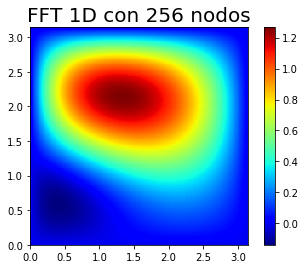

In [24]:
plot(x, y, w, plot_title="FFT 1D con 256 nodos")

In [25]:
L2_error(w, u)

0.008383782982861231

### Análisis de Convergencia y Complejidad

In [26]:
N = [2**i for i in range(4, 11)]
error_sp = []
error_d2 = []
error_df = []

time_sp = []
time_d2 = []
time_df = []

for n in N:

    x = np.linspace(0, np.pi, n)

    # Calculo del error
    w_sp = spectral(x, x, n, n, f_rhs)
    w_d2 = DF_FFT_2D(x, x, n, n, f_rhs)
    w_df = DF_FFT(x, x, n, f_rhs)

    u = fa(x, x) # Solucion analitica

    error_sp.append(L2_error(w_sp, u))
    error_d2.append(L2_error(w_d2, u))
    error_df.append(L2_error(w_df, u))
    
    # Calculo de complejidad
    tsp = %timeit -r 1 -n 1 -o -q spectral(x, x, n, n, f_rhs)
    td2 = %timeit -r 1 -n 1 -o -q DF_FFT_2D(x, x, n, n, f_rhs)
    tdf = %timeit -r 1 -n 1 -o -q DF_FFT(x, x, n, f_rhs)

    time_sp.append(tsp.best)   
    time_d2.append(td2.best)
    time_df.append(tdf.best)

### Convergencia del Error

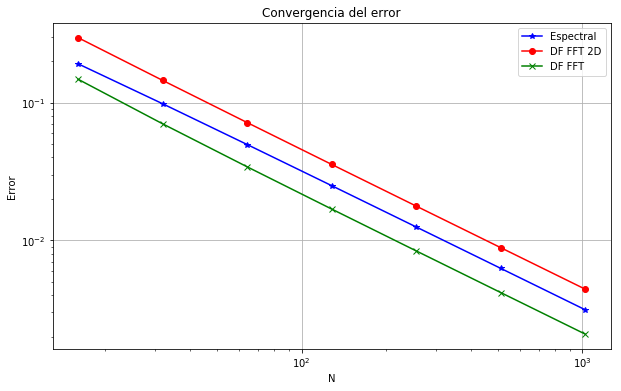

In [27]:
convergence_plot(N, error_sp, error_d2, error_df)

Notamos del gráfico que la convergencia de los métodos es de segundo orden, aunque el método espectral debería tener justamente una convergencia espectral (que por algún motivo no se alcanza).

### Complejidad Algoritmica

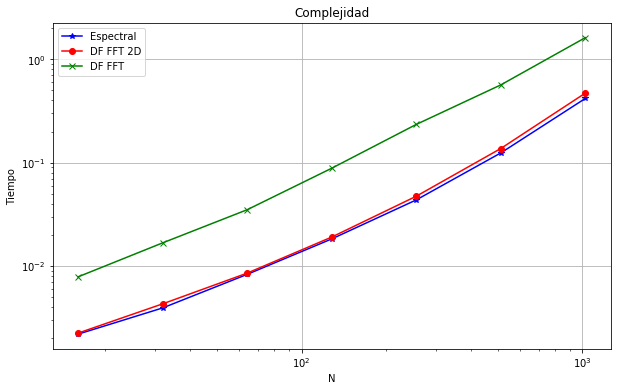

In [28]:
complexity_plot(N, time_sp, time_d2, time_df)

Del gráfico de complejidad, es posible notar que siguen una tendencia de lo que sería una complejidad $O(n\log n)$. 
Debería haber un resultado mejor para el método FFT en 1D, pero se puede culpar al *solver* utilizado para resolver el sistema tridiagonal en que haya un costo extra de tiempo en ejecución.

### Uso de Memoria

Suponiendo que almacenar un número de tipo flotante con doble precisión ocupa 8 bytes de memoria, entonces:

* Para el uso del método espectral tenemos el siguiente uso de memoria:
    1. Matriz con la transformada de Fourier de $f(x,y)$ en 2D: $8 (M\times N)$ bytes.
    2. Matriz para manejar el dominio de Fourier en 2D (para $j$ y $k$): $16(M\times N)$ bytes.
    3. Matriz con $U(j,k)$ en 2D: $8 (M\times N)$ bytes.
    4. Matriz con la transformada inversa de Fourier de ($U(j,k)$) en 2D: $8 (M\times N)$ bytes.
    5. Total: $40(M\times N)$ bytes.
* Para el uso de diferencias finitas aceleradas con FFT en 2D tenemos el siguiente uso de memoria:
    1. Matriz con la transformada de Fourier de $f(x,y)$ en 2D: $8 (M\times N)$ bytes.
    2. Matriz para manejar el dominio de Fourier en 2D (para $j$ y $k$): $16(M\times N)$ bytes.
    3. Matriz con $U(j,k)$ en 2D: $8 (M\times N)$ bytes.
    4. Matriz con la transformada inversa de Fourier de ($U(j,k)$) en 2D: $8 (M\times N)$ bytes.
    5. Total: $40(M\times N)$ bytes.
* Para el uso de diferencias finitas aceleradas con FFT en 2D tenemos el siguiente uso de memoria:
    1. Matriz con la transformada de Fourier de $f(x,y)$ en 2D: $8 (M\times N)$ bytes.
    2. Vector para manejar el dominio de Fourier en 1D (para $j$ y $k$): $8M$ bytes.
    3. Matriz tridiagonal para generar el sistema lineal: $8(M\times N)$ bytes.
    4. $M$ Vectores con resultado del sistema lineal: $8(M\times N)$ bytes.
    4. Matriz con la transformada inversa de Fourier de ($U(j,k)$) en 2D: $8 (M\times N)$ bytes.
    5. Total: $32(M\times N) + 8M$ bytes.

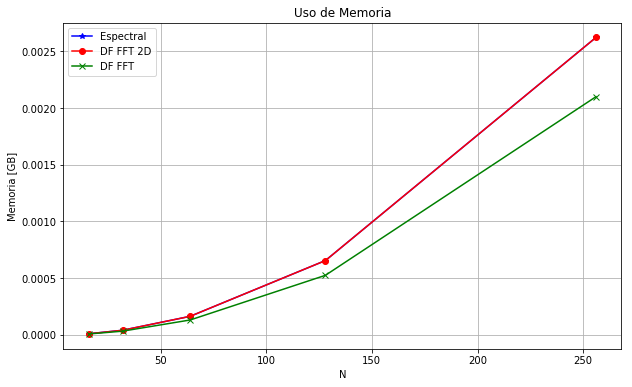

In [29]:
m1 = lambda N: 40*N**2*1e-9
m2 = lambda N: 40*N**2*1e-9
m3 = lambda N: 8*(4*N**2 + N)*1e-9

N = np.array([2**i for i in range(4, 9)])

memory_plot(N, m1(N), m2(N), m3(N))

En cuanto a uso de memoria, notamos que no existe una diferencia significativa. Aún así para una mayor cantidad de nodos, sería mejor utilizar diferencias finitas aceleradas con FFT en 1D.

<div id="conclusiones" />
## 3. Conclusiones

Del desarrollo del proyecto se obtuvieron las siguientes conclusiones:

* Es posible ver que el uso de métodos relacionados con la FFT (DST), tienen resultados cualitativamente buenos para la resolución de EDP's.
* La complejidad de los algoritmos indican que computacionalmente son métodos eficientes para este tipo de problemas.
* Según el análisis de los gráficos no existe una diferencia significativa en los resultados de cada algoritmo, pero aún así dependerá de los recursos de cómputo disponibles.
* Gracias a la optimización de las librerías para el cálculo de las FFT (DST), es posible obtener resultados en una cantidad de tiempo bastante inferior que aplicando los métodos usuales.

<div id="referencias" />
## 4. Referencias 

* [1] Briggs, W. L., & Henson, V. E. (1995). The DFT: an owner's manual for the discrete Fourier transform. Society for Industrial and Applied Mathematics.
* [2] Moin, P. (2010). Fundamentals of engineering numerical analysis. Cambridge University Press. 	
